**the copy to delete price bin from features**

In [1]:
import sys
sys.path.append(r'C:\Users\lzowe\OneDrive - The City College of New York\CCNY_Course\Applied_Machine_Learning_and_Data_Mining\codes\project-product-price-prediction')

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from final.feature_extraction.vectorization import text_vectorizaion
from final.dimension_reduction.feature_reduction import dimension_reduction

matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

# Data preparation for regression

## loading data processed using Tokenizing and tf-idf algorithm

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/DSEI21000-S21/project-product-price-prediction/main/data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")

In [4]:
df.shape

(50000, 34)

In [5]:
df.describe()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_upper_char_count,item_name_stopword_count,item_name_punctuation_count,item_name_number_count,item_name_after_word_count,item_name_after_char_count,item_name_after_avg_word_len,item_condition_id,shipping,price
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,7.373508e+05,26.583180,150.390920,5.667798,1.876040,12.577260,7.67970,5.850200,0.499880,18.323300,...,4.794540,0.192960,0.414340,0.177680,4.236300,24.381740,5.845573,1.991820,0.376700,108.41749
std,4.251891e+05,28.205148,161.300927,0.782677,5.826971,28.114883,10.36772,8.336725,1.229061,18.691275,...,5.226287,0.463088,0.828128,0.422508,1.535705,8.740065,1.210724,0.896911,0.484564,198.75487
min,1.900000e+01,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.00000
25%,3.726685e+05,8.000000,46.000000,5.210526,0.000000,2.000000,1.00000,1.000000,0.000000,7.000000,...,2.000000,0.000000,0.000000,0.000000,3.000000,18.000000,5.000000,1.000000,0.000000,20.00000
50%,7.353620e+05,17.000000,97.000000,5.642857,0.000000,5.000000,4.00000,3.000000,0.000000,12.000000,...,3.000000,0.000000,0.000000,0.000000,4.000000,25.000000,5.750000,2.000000,0.000000,50.00000
75%,1.102881e+06,34.000000,191.000000,6.020944,1.000000,12.000000,10.00000,8.000000,1.000000,23.000000,...,6.000000,0.000000,1.000000,0.000000,5.000000,32.000000,6.500000,3.000000,1.000000,90.00000
max,1.482519e+06,206.000000,1007.000000,19.600000,178.000000,761.000000,104.00000,308.000000,57.000000,175.000000,...,37.000000,6.000000,12.000000,9.000000,13.000000,42.000000,26.000000,5.000000,1.000000,2009.00000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   clean_item_description               50000 non-null  object 
 2   item_description_bef_word_count      50000 non-null  float64
 3   item_description_bef_char_count      50000 non-null  float64
 4   item_description_bef_avg_word_len    50000 non-null  float64
 5   item_description_upper_word_count    50000 non-null  float64
 6   item_description_upper_char_count    50000 non-null  float64
 7   item_description_stopword_count      50000 non-null  float64
 8   item_description_punctuation_count   50000 non-null  float64
 9   item_description_number_count        50000 non-null  float64
 10  item_description_after_word_count    50000 non-null  float64
 11  item_description_after_char_

In [19]:
df.clean_item_name.unique().shape

(42039,)

In [20]:
df.head()

,train_id,clean_item_description,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,new tags,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,nastasya every hills lipstick fashion,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,brand new tags taken bag pictures,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,bought calves bit large frowned good condition...,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,brand new box size 7youth859womens,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


 ## Feature extraction and dimension selection
 
 For Item-discription feature: <br>
 using Jin's function to, firstly, do feature-extraction, increasing up to 14230 new few features <br>
 secondly, do dimenstion-reduction <br>
 finally, left 100 

In [21]:
df.clean_item_description[12]

'corners bottom great shape lips smells markings inside cleanthere small water mark indicated third photo comes dusting'

In [22]:
description_feature,  description_feature_name = text_vectorizaion(df, text_col = "clean_item_description", 
                                                                   tfidf = True, min_df=10, max_features=100000)

In [23]:
description_feature.shape

(50000, 14230)

In [24]:
data = dimension_reduction(description_feature.toarray(), method = 'SVD', n_comp = 100)

In [25]:
data.shape

(50000, 100)

In [26]:
df_cid = pd.DataFrame(data.copy()) #df for cleaned item description transforming to new features
df_cid.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000323,0.316579,0.226464,-0.093895,-0.145723,-0.160602,-0.003327,-0.018077,0.090900,0.191938,...,-0.009365,-0.007802,0.000988,0.007139,0.000579,-0.007441,0.011442,-0.005314,0.005621,0.012272
1,0.000036,0.006363,-0.001485,-0.000307,-0.003074,0.008708,0.000233,-0.001262,-0.002304,0.001749,...,0.014814,-0.003388,-0.013207,0.006083,0.021986,0.002001,0.002422,-0.014691,-0.033301,-0.012099
2,0.000307,0.282559,0.198734,-0.108195,-0.022316,-0.049014,-0.093212,0.013356,-0.023779,0.027204,...,0.004497,0.000500,0.011348,0.010120,0.008777,-0.010274,0.020882,0.025721,-0.014054,0.020543
3,0.000196,0.087350,-0.138583,-0.028887,-0.007243,-0.041192,-0.030503,0.157936,0.007523,0.001825,...,-0.036633,0.010765,-0.004607,-0.014419,-0.003739,-0.002078,-0.028276,0.004454,0.042921,0.014607
4,0.000409,0.407447,0.230953,-0.090664,-0.028016,-0.120191,-0.079088,0.052899,-0.152949,-0.178796,...,-0.008531,-0.000866,0.004440,-0.010608,0.006655,0.024111,-0.005335,0.024638,0.010813,-0.002061


## Concatenating new features df_cid and previous df

In [27]:
df1=df.copy()
df1.drop("clean_item_description", inplace=True,axis=1)
df1.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,item_name_after_avg_word_len,item_condition_id,category_name,brand_name,shipping,price,c1,c2,c3,price_bin
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,5.250000,1,Women/Athletic Apparel/Shirts & Tops,Nike,1,15.0,women,athletic apparel,shirts & tops,"(10, 15]"
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,10.000000,1,Beauty/Makeup/Lips,Anastasia Beverly Hills,0,22.0,beauty,makeup,lips,"(20, 25]"
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,6.166667,1,Women/Jeans/Leggings,LuLaRoe,0,54.0,women,jeans,leggings,"(50, 60]"
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,5.333333,3,Women/Shoes/Boots,Hunter,0,84.0,women,shoes,boots,"(80, 90]"
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,4.000000,1,Women/Shoes/Athletic,Nike,0,56.0,women,shoes,athletic,"(50, 60]"


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   train_id                             50000 non-null  int64  
 1   item_description_bef_word_count      50000 non-null  float64
 2   item_description_bef_char_count      50000 non-null  float64
 3   item_description_bef_avg_word_len    50000 non-null  float64
 4   item_description_upper_word_count    50000 non-null  float64
 5   item_description_upper_char_count    50000 non-null  float64
 6   item_description_stopword_count      50000 non-null  float64
 7   item_description_punctuation_count   50000 non-null  float64
 8   item_description_number_count        50000 non-null  float64
 9   item_description_after_word_count    50000 non-null  float64
 10  item_description_after_char_count    50000 non-null  float64
 11  item_description_after_avg_w

In [29]:
df1.shape,df_cid.shape

((50000, 33), (50000, 100))

In [30]:
df_concat=pd.concat([df1,df_cid],axis=1)
df_concat.shape

(50000, 133)

## Using one-hot encoding for category and nominal features

delete price bins

In [31]:
cols_catNnom = ['category_name','brand_name', 'c1', 'c2', 'c3'] # columns of category and nominal features

In [32]:
from final.feature_encoding.one_hot_encoding import one_hot_encode_feature
df_encode = df_concat
for col in cols_catNnom:
    df_encode, col_encode = one_hot_encode_feature(df_encode, encode_column=col,drop_first=False)
df_encode.shape

(50000, 3028)

In [33]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3028 entries, train_id to c3_yoga & pilates
dtypes: float64(123), int64(3), object(2), uint8(2900)
memory usage: 187.1+ MB


In [34]:
df_encode.head()

,train_id,item_description_bef_word_count,item_description_bef_char_count,item_description_bef_avg_word_len,item_description_upper_word_count,item_description_upper_char_count,item_description_stopword_count,item_description_punctuation_count,item_description_number_count,item_description_after_word_count,...,c3_window treatments,"c3_wine, beer & beverage coolers",c3_wipes & holders,c3_women,c3_women's golf clubs,c3_wool,c3_work & safety,c3_wrap,c3_writing,c3_yoga & pilates
0,806824,3.0,13.0,4.333333,0.0,1.0,1.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,772820,6.0,42.0,7.000000,0.0,4.0,1.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,1423115,11.0,54.0,4.909091,0.0,1.0,5.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,405853,35.0,188.0,5.371429,1.0,4.0,17.0,7.0,1.0,17.0,...,0,0,0,0,0,0,0,0,0,0
4,1172086,6.0,40.0,6.666667,0.0,3.0,1.0,3.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_encode[["price"]]

,price
0,15.0
1,22.0
2,54.0
3,84.0
4,56.0
...,...
49995,1609.0
49996,205.0
49997,36.0
49998,20.0


In [36]:
# prepare input X, y
X, y = df_encode.copy().drop(["clean_item_name","train_id","price","price_bin"],axis=1), df_encode[["price"]] 

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3024 entries, item_description_bef_word_count to c3_yoga & pilates
dtypes: float64(122), int64(2), uint8(2900)
memory usage: 185.6 MB


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

## Conduct dimension reduction on the dateframe processed by one-hot encoding
skip this step in the first place. <br>
let us see how the regression result looks like. and then determine if the dimension reduction on whole dataset needed, or if use other techniques to avoid overfitting(e.g. adding penalty, using RobustScaler, conducting cross validation).<br>



* log 1: actually can't skip this step, the dimension is too large to run, Exception was raised: MemoryError: Unable to allocate 11.8 GiB for an array with shape (45079, 35000) and data type float64.
Therefore, try conduct PCA again before regression

* log 2: even can't not run PCA due to the large number of features. Try drop clean_item_name instead of encoding it, as it is has very less duplicated items.

* log 3: Since log2 works, skip this step( e.i. 1.5) for now.

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

MemoryError: Unable to allocate 11.8 GiB for an array with shape (45079, 35000) and data type float64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

# Regression Model Selection
Proposal:
1. try different regression techniques, and select the best one;
      - DT regressor
      * Ensemble method
      - Adding polynomial items to multiple linear regression? 
      - Tensorflow.Keras
2. focus on the selected one and tuning modelling.(Guessing propably would use Ensemble learning or Keras in the end)<br>
**Based on the our previous experiment so far, our results have both large bias and variance.** Probably need to use more powerful algorithm to improve the bias, and then considering solve overfitting issue?

## Regression Tree

In [39]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score 
def evaluate_dt_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth):
    # the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = tree.DecisionTreeRegressor(max_depth=max_depth)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

In [40]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=None)

Train score: MSE: 1.4285714285714285e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 12902.513933333334 EVS: 0.6595504191793897 R2: 0.6576763319629508


In [41]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=3)

Train score: MSE: 26178.390421470976 EVS: 0.35005735066265153 R2: 0.35005735066265153
Test score: MSE: 24598.421519710446 EVS: 0.3474560519211184 R2: 0.3473657981647831


In [42]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,1,max_depth=5)

Train score: MSE: 20763.66149254207 EVS: 0.4844912562180217 R2: 0.4844912562180217
Test score: MSE: 20659.458770726862 EVS: 0.4519274497193836 R2: 0.451872577499452


In [43]:
evaluate_dt_regressor(X_train, X_test, y_train, y_test,10,max_depth=None)

Train score: MSE: 1.4285714285714289e-05 EVS: 0.9999999996453222 R2: 0.9999999996453222
Test score: MSE: 12946.810961666666 EVS: 0.6585631046469695 R2: 0.6565010632284578


## Ensemble learning

### Random Forest (Bagging) for classification, also for regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
def evaluate_rf_regressor(X_train, X_test, y_train, y_test,n_iter,max_depth,random_state):
    MSE_test=[]
    EVS_test=[]
    R2_test=[]
    MSE_train=[]
    EVS_train=[]
    R2_train=[]
    for i in range(n_iter):
        rg = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
        rg.fit(X_train, y_train)
        y_train_pred = rg.predict(X_train)
        y_pred = rg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, y_train_pred))
        EVS_train.append(explained_variance_score(y_train, y_train_pred))
        R2_train.append(r2_score(y_train, y_train_pred))
        
        MSE_test.append(mean_squared_error(y_test, y_pred))
        EVS_test.append(explained_variance_score(y_test, y_pred))
        R2_test.append(r2_score(y_test, y_pred))
    print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
    print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

rf_regressor turns out very very slow

In [45]:
evaluate_rf_regressor(X_train, X_test, y_train, y_test,1,max_depth=None,random_state=42)

<ipython-input-44-ffee7f25d399>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train, y_train)


Train score: MSE: 920.833369167575 EVS: 0.97733617618663 R2: 0.9771380566215354
Test score: MSE: 6343.594810344309 EVS: 0.8335115518873721 R2: 0.83169460965218


#### Check Feature Importance

In [46]:
rg = RandomForestRegressor(max_depth=None, random_state=42)
rg.fit(X_train, y_train)
y_train_pred = rg.predict(X_train)
y_pred = rg.predict(X_test)
MSE_train.append(mean_squared_error(y_train, y_train_pred))
EVS_train.append(explained_variance_score(y_train, y_train_pred))
R2_train.append(r2_score(y_train, y_train_pred))

MSE_test.append(mean_squared_error(y_test, y_pred))
EVS_test.append(explained_variance_score(y_test, y_pred))
R2_test.append(r2_score(y_test, y_pred))
print("Train score:","MSE: {}".format(sum(MSE_train)/n_iter),"EVS: {}".format(sum(EVS_train)/n_iter),"R2: {}".format(sum(R2_train)/n_iter),)
print("Test score:","MSE: {}".format(sum(MSE_test)/n_iter),"EVS: {}".format(sum(EVS_test)/n_iter),"R2: {}".format(sum(R2_test)/n_iter),)

<ipython-input-46-5f5cddb06bbb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rg.fit(X_train, y_train)


NameError: name 'MSE_train' is not defined

In [47]:
importances = rg.feature_importances_
importances.shape

(3024,)

In [48]:
X.shape

(50000, 3024)

 1) brand_name_Louis Vuitton       0.212976
 2) brand_name_Chanel              0.041905
 3) category_name_Electronics/Computers & Tablets/Laptops & Netbooks 0.035939
 4) c3_laptops & netbooks          0.035322
 5) c2_women's handbags            0.030903
 6) brand_name_MCM Worldwide       0.022008
 7) brand_name_Saint Laurent       0.021234
 8) c3_cell phones & smartphones   0.017868
 9) item_condition_id              0.014860
10) brand_name_Celine              0.013478
11) 9                              0.013429
12) category_name_Electronics/Cell Phones & Accessories/Cell Phones & Smartphones 0.011492
13) 8                              0.010319
14) item_name_bef_char_count       0.009918
15) item_name_bef_word_count       0.008074
16) c2_women's accessories         0.007671
17) brand_name_David Yurman        0.007210
18) 90                             0.007135
19) brand_name_Gucci               0.006995
20) 81                             0.006533
21) item_name_after_avg_word_len   0.00

1581) category_name_Vintage & Collectibles/Trading Cards/Vintage 0.000000
1582) brand_name_KidCo               0.000000
1583) category_name_Vintage & Collectibles/Toy/Puzzle 0.000000
1584) brand_name_Big Time Toys       0.000000
1585) brand_name_Melissa             0.000000
1586) c3_pleated                     0.000000
1587) category_name_Kids/Girls 2T-5T/Coats & Jackets 0.000000
1588) brand_name_Pampered Chef       0.000000
1589) brand_name_Merrell             0.000000
1590) brand_name_Twenty One          0.000000
1591) category_name_Women/Jeans/Overalls 0.000000
1592) brand_name_Ferasali            0.000000
1593) brand_name_Laura Geller        0.000000
1594) brand_name_Kendall & Kylie     0.000000
1595) brand_name_Jamberry            0.000000
1596) brand_name_Rampage             0.000000
1597) brand_name_BKE                 0.000000
1598) c3_pant suit                   0.000000
1599) brand_name_Jane Iredale        0.000000
1600) brand_name_LA Idol             0.000000
1601) c2_servin

<ipython-input-49-6dde926f3fcd>:17: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


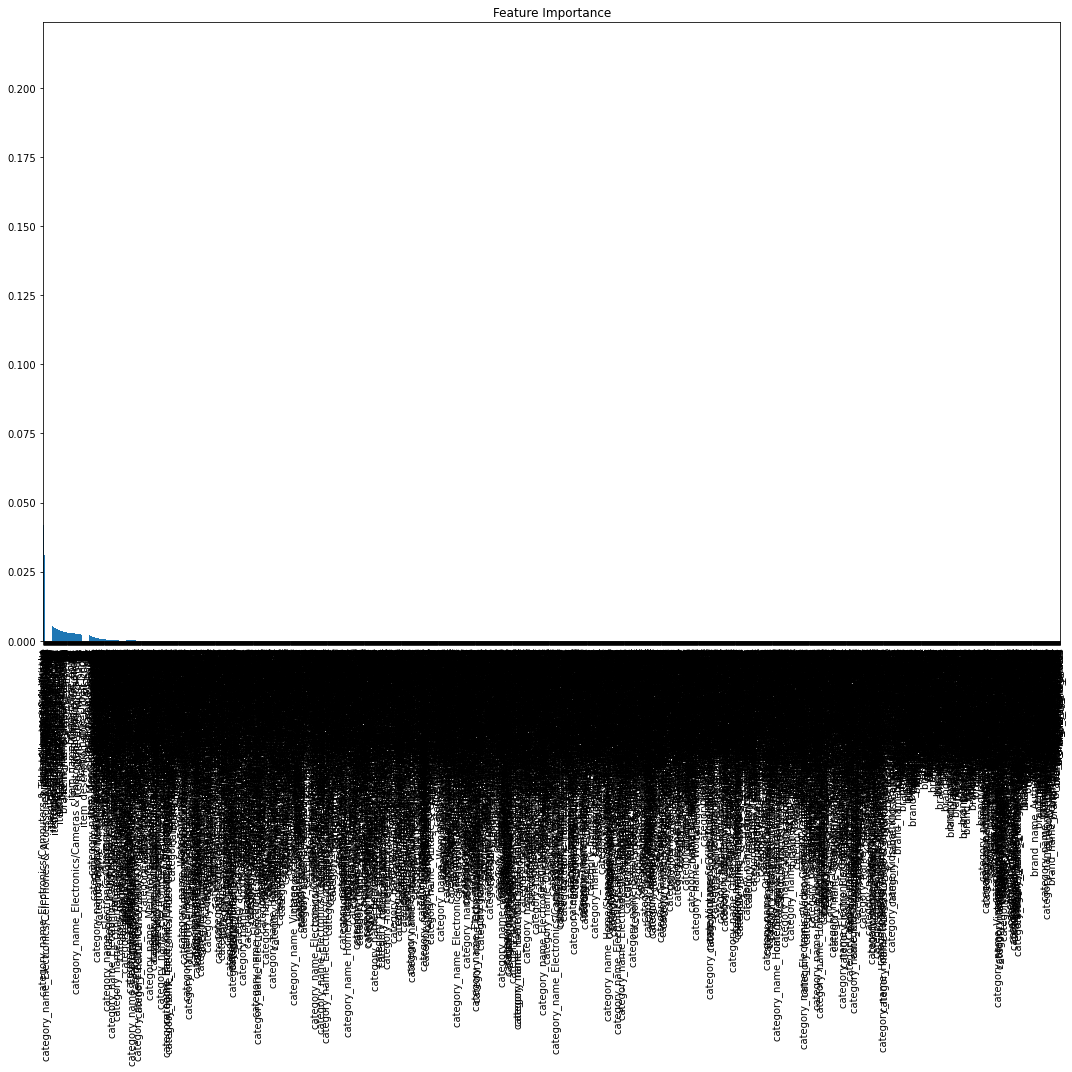

In [49]:
feat_labels = X.columns
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

RFE is very slow due to the large number of features.<br>
It is wisely to use RFE for fine select a few features from a small number of features 

### Boosting

### Stacking 

## Turning multiple linear regression with polynomial regression

## Tensorflow

In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

# Fine tune selected model

## Cross_validation

## validation curve vs learning curve

## Regularization penalty

# make it pipeline and apply to the whole dataset